In [16]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [17]:
#topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
#commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
flask=pd.read_csv('data/pallets_flask.csv', sep=",")

## Data Info

In [18]:
flask.head

<bound method NDFrame.head of        owner   repo                       fileTuple<fileName.fileSize>
0    pallets  flask      ('main/.devcontainer/devcontainer.json', 434)
1    pallets  flask   ('main/.devcontainer/on-create-command.sh', 170)
2    pallets  flask                        ('main/.editorconfig', 217)
3    pallets  flask                              ('main/.flake8', 544)
4    pallets  flask  ('main/.github/ISSUE_TEMPLATE/bug-report.md', ...
..       ...    ...                                                ...
244  pallets  flask                 ('main/tests/test_views.py', 6698)
245  pallets  flask  ('main/tests/typing/typing_app_decorators.py',...
246  pallets  flask  ('main/tests/typing/typing_error_handler.py', ...
247  pallets  flask        ('main/tests/typing/typing_route.py', 2536)
248  pallets  flask                             ('main/tox.ini', 1256)

[249 rows x 3 columns]>

In [19]:
flask.shape

(249, 3)

In [20]:
flask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   owner                         249 non-null    object
 1   repo                          249 non-null    object
 2   fileTuple<fileName.fileSize>  249 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [21]:
flask.isnull().sum()

owner                           0
repo                            0
fileTuple<fileName.fileSize>    0
dtype: int64

# EDA

### React EDA

In [22]:
flask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   owner                         249 non-null    object
 1   repo                          249 non-null    object
 2   fileTuple<fileName.fileSize>  249 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [23]:
flask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   owner                         249 non-null    object
 1   repo                          249 non-null    object
 2   fileTuple<fileName.fileSize>  249 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [24]:
flask.head()

,owner,repo,fileTuple<fileName.fileSize>
0,pallets,flask,"('main/.devcontainer/devcontainer.json', 434)"
1,pallets,flask,"('main/.devcontainer/on-create-command.sh', 170)"
2,pallets,flask,"('main/.editorconfig', 217)"
3,pallets,flask,"('main/.flake8', 544)"
4,pallets,flask,"('main/.github/ISSUE_TEMPLATE/bug-report.md', ..."


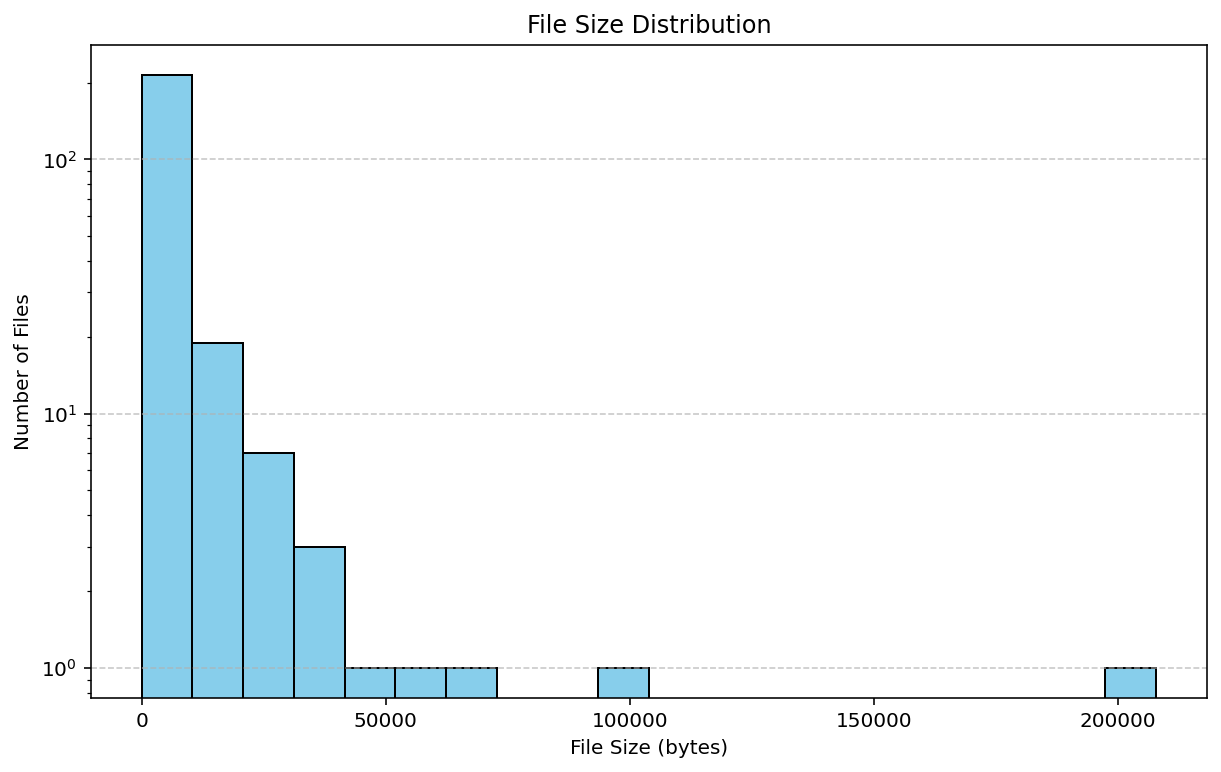

In [25]:
flask = flask.rename(columns={'fileTuple<fileName.fileSize>': 'name-size', })

flask[['filePath', 'fileSize']] = flask['name-size'].str.rstrip(')').str.split(', ', expand=True)
flask['fileSize'] = flask['fileSize'].astype(int)

plt.figure(figsize=(10, 6))
plt.hist(flask['fileSize'], bins=20, color='skyblue', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Files')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

In [26]:
# Categorize files
def categorize_file(file_path):
    if '/tests/' in file_path:
        return 'Test'
    elif '/docs/' in file_path or '/documentation/' in file_path:
        return 'Documentation'
    elif '/.github/' in file_path:
        return 'GitHub Configuration'
    else:
        return 'Code'

flask['fileCategory'] = flask['filePath'].apply(categorize_file)

# Calculate the ratio of code to documentation
code_count = flask[flask['fileCategory'] == 'Code'].shape[0]
documentation_count = flask[flask['fileCategory'] == 'Documentation'].shape[0]

ratio_code_to_documentation = code_count / documentation_count if documentation_count != 0 else 0

print(f"Number of code files: {code_count}")
print(f"Number of documentation files: {documentation_count}")
print(f"Ratio of code to documentation: {ratio_code_to_documentation:.2f}")

Number of code files: 86
Number of documentation files: 86
Ratio of code to documentation: 1.00
